### NAME : R.YUVARAJ

### ROLL NO : 225229149

## SMA Lab Assignment 1: Exploring networks using networkx package

In [1]:
import numpy as np
import math

In [2]:
import networkx as nx

In [3]:
G = nx.Graph()

In [4]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


In [5]:
G.add_node('A')

In [6]:
G.add_nodes_from(['B','C',"D","E"])

In [7]:
G.add_edge(*('A','B'))

In [8]:
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E')])

In [9]:
print("Vertex set: ",G.nodes())


Vertex set:  ['A', 'B', 'C', 'D', 'E']


In [10]:
Vertexset: ['A', 'B', 'C', 'D', 'E']

In [11]:
print("Edge set: ",G.edges())

Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]


In [12]:
Edgeset: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]

In [13]:
import matplotlib.pyplot as plt

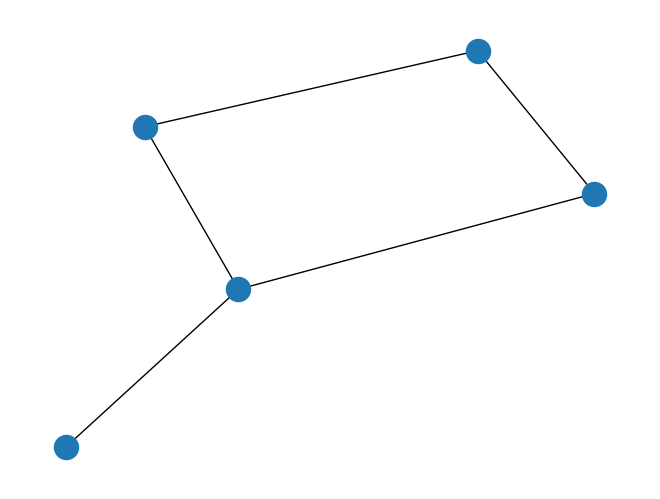

In [14]:
nx.draw(G)
plt.show()

[]
[]
Vertex set:  ['A', 'B', 'C', 'D', 'E']
Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]


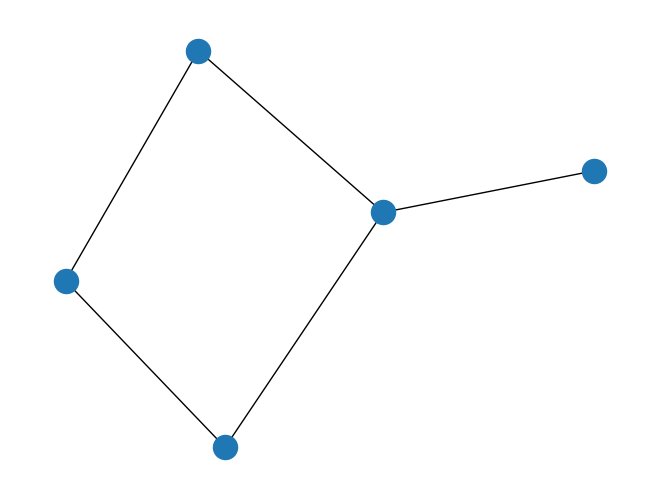

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

print(G.nodes())  # returns a list
print(G.edges())  # returns a list

G.add_node('A')
G.add_nodes_from(['B', 'C', 'D', 'E'])
G.add_edge('A', 'B')
G.add_edges_from([('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')])

print("Vertex set: ", G.nodes())
print("Edge set: ", G.edges())

nx.draw(G)
plt.show()

In [16]:
plt.savefig('graph.png') 

<Figure size 640x480 with 0 Axes>

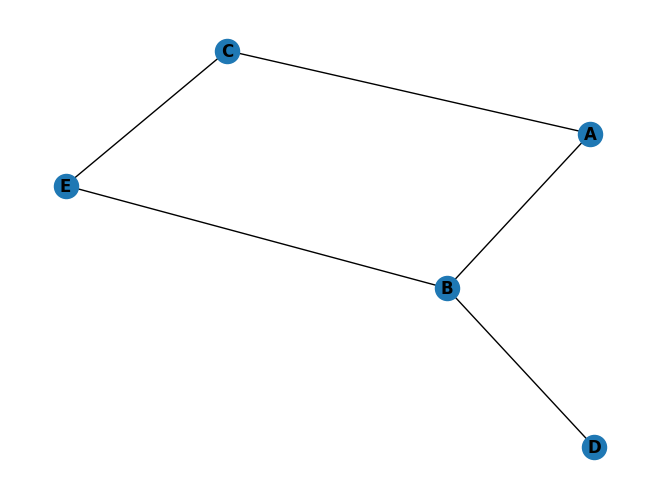

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [18]:
GP = nx.petersen_graph()

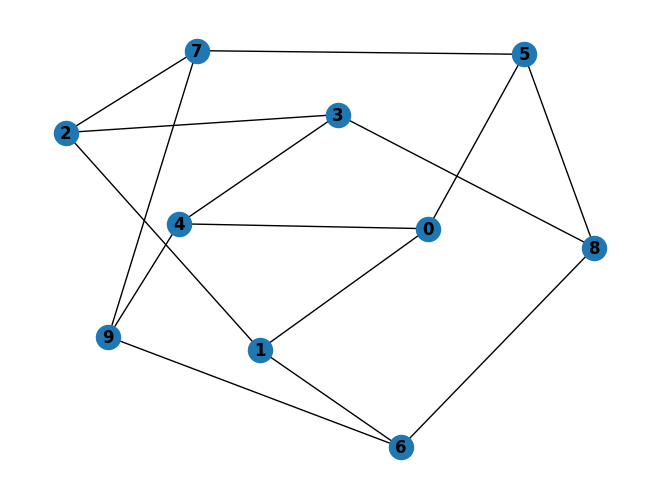

In [19]:
nx.draw(GP, with_labels=True, font_weight='bold')
plt.show()

In [20]:
print(G.adj)

{'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'D': {}, 'E': {}}, 'C': {'A': {}, 'E': {}}, 'D': {'B': {}}, 'E': {'B': {}, 'C': {}}}


In [21]:
G.degree("A")

2

In [22]:
G = nx.Graph() 
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)]
G.add_weighted_edges_from(E)

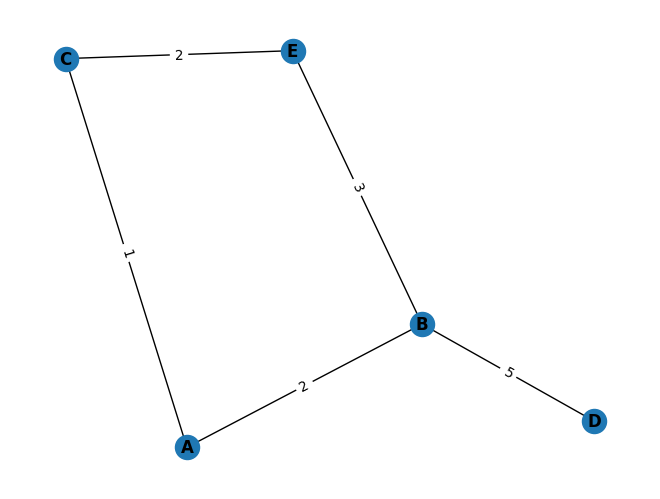

In [23]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [24]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [27]:
# Preview edgelist
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [28]:
# Grab node list data hosted on Gist
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [29]:
# Preview nodelist
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [30]:
# Create empty graph
g = nx.Graph()

In [31]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [32]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

o_gy2
y_gy2
{'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}


In [33]:
# Create empty graph
G= nx.Graph()

# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    G.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

# Add node attributes
for i, nlrow in nodelist.iterrows():
    G.add_node(nlrow['id'], **nlrow[1:].to_dict())

In [34]:
# Node list example
print(nlrow)

id    y_rt
X      977
Y     1666
Name: 76, dtype: object


In [35]:
# Preview first 5 edges
list(g.edges(data=True))[0:5]

[('rs_end_north',
  'v_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.3,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'b_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.21,
    'color': 'red',
    'estimate': 0}}),
 ('v_rs',
  'v_bv',
  {'attr_dict': {'trail': 'v',
    'distance': 0.52,
    'color': 'violet',
    'estimate': 0}}),
 ('v_rs',
  'v_end_east',
  {'attr_dict': {'trail': 'v',
    'distance': 0.54,
    'color': 'violet',
    'estimate': 0}}),
 ('b_rs',
  'g_rs',
  {'attr_dict': {'trail': 'rs',
    'distance': 0.11,
    'color': 'red',
    'estimate': 0}})]

In [36]:
# Preview first 10 nodes
list(g.nodes(data=True))[0:10]

[('rs_end_north', {}),
 ('v_rs', {}),
 ('b_rs', {}),
 ('g_rs', {}),
 ('w_rs', {}),
 ('o_rs', {}),
 ('y_rs', {}),
 ('rs_end_south', {}),
 ('rc_end_north', {}),
 ('v_rc', {})]

In [37]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 123
# of nodes: 77


In [38]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in G.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'w_rs': (1646, -947)}

In [39]:
# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['attr_dict']['color'] for e in g.edges(data=True)]

# Preview first 10 edge colors
edge_colors[0:10]

['red',
 'red',
 'violet',
 'violet',
 'red',
 'blue',
 'blue',
 'red',
 'green',
 'green']

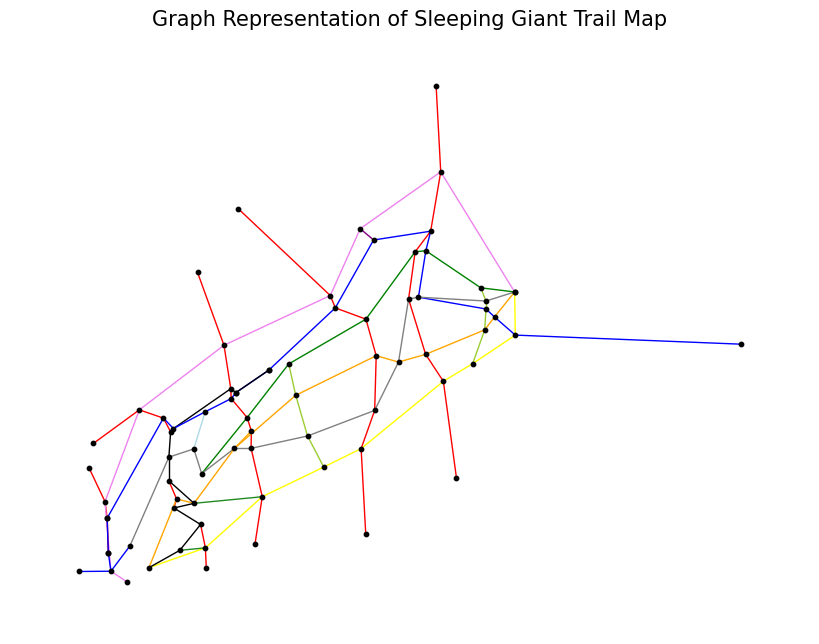

In [40]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

In [41]:
# Calculate list of nodes with odd degree
nodes_odd_degree = [v for v, d in g.degree() if d % 2 == 1]

# Preview
nodes_odd_degree[0:5]


['rs_end_north',
 'rs_end_south',
 'rc_end_north',
 'rc_end_south',
 'rt_end_north']

In [42]:
# Counts
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 36
Number of total nodes: 77


In [43]:
# Compute all pairs of odd nodes. in a list of tuples
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))

# Preview pairs of odd degree nodes
odd_node_pairs[0:10]

[('rs_end_north', 'rs_end_south'),
 ('rs_end_north', 'rc_end_north'),
 ('rs_end_north', 'rc_end_south'),
 ('rs_end_north', 'rt_end_north'),
 ('rs_end_north', 'o_rt'),
 ('rs_end_north', 'y_rt'),
 ('rs_end_north', 'rt_end_south'),
 ('rs_end_north', 'rh_end_north'),
 ('rs_end_north', 'rh_end_tt_1'),
 ('rs_end_north', 'rh_end_tt_2')]

In [44]:
# Counts
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 630


In [45]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [46]:
# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')

# Preview with a bit of hack (there is no head/slice method for dictionaries).
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

{('rs_end_north', 'rs_end_south'): 7,
 ('rs_end_north', 'rc_end_north'): 4,
 ('rs_end_north', 'rc_end_south'): 8,
 ('rs_end_north', 'rt_end_north'): 5,
 ('rs_end_north', 'o_rt'): 7,
 ('rs_end_north', 'y_rt'): 9,
 ('rs_end_north', 'rt_end_south'): 10,
 ('rs_end_north', 'rh_end_north'): 6,
 ('rs_end_north', 'rh_end_tt_1'): 7,
 ('rs_end_north', 'rh_end_tt_2'): 9}

In [47]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters:
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], attr_dict={'distance': v, 'weight': wt_i})
    return g

In [48]:
# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 36
Number of edges: 630


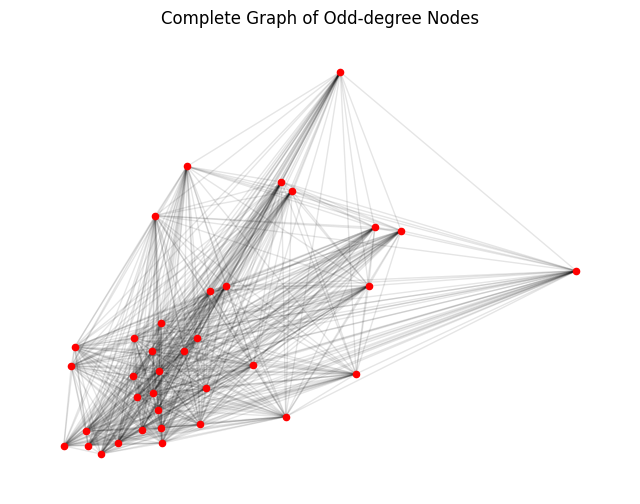

In [49]:
# Plot the complete graph of odd-degree nodes
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

In [50]:
# Compute min weight matching.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 18


In [51]:
# Preview of matching with dupes
odd_matching_dupes

{('b_bv', 'rh_end_tt_3'),
 ('b_bw', 'y_rh'),
 ('b_end_east', 'rh_end_tt_2'),
 ('b_end_west', 'rh_end_south'),
 ('b_tt_3', 'rh_end_tt_4'),
 ('b_v', 'v_end_west'),
 ('g_gy1', 'y_rt'),
 ('g_gy2', 'o_rt'),
 ('g_w', 'rh_end_north'),
 ('nature_end_west', 'rs_end_north'),
 ('o_tt', 'rc_end_south'),
 ('o_w_1', 'rt_end_south'),
 ('o_y_tt_end_west', 'rt_end_north'),
 ('v_bv', 'rd_end_south'),
 ('v_end_east', 'rd_end_north'),
 ('w_bw', 'rh_end_tt_1'),
 ('y_gy1', 'rc_end_north'),
 ('y_gy2', 'rs_end_south')}

In [60]:
# Convert matching to list and deduplicate
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes]))
print('Number of edges in matching (deduplicated): {}'.format(len(odd_matching)))

Number of edges in matching (deduplicated): 18


In [61]:
# Preview of deduped matching
odd_matching

[('b_end_west', 'rh_end_south'),
 ('g_gy2', 'o_rt'),
 ('rs_end_south', 'y_gy2'),
 ('g_gy1', 'y_rt'),
 ('o_tt', 'rc_end_south'),
 ('b_end_east', 'rh_end_tt_2'),
 ('b_bv', 'rh_end_tt_3'),
 ('rd_end_north', 'v_end_east'),
 ('g_w', 'rh_end_north'),
 ('rh_end_tt_1', 'w_bw'),
 ('b_tt_3', 'rh_end_tt_4'),
 ('o_y_tt_end_west', 'rt_end_north'),
 ('o_w_1', 'rt_end_south'),
 ('rc_end_north', 'y_gy1'),
 ('b_bw', 'y_rh'),
 ('rd_end_south', 'v_bv'),
 ('nature_end_west', 'rs_end_north'),
 ('b_v', 'v_end_west')]

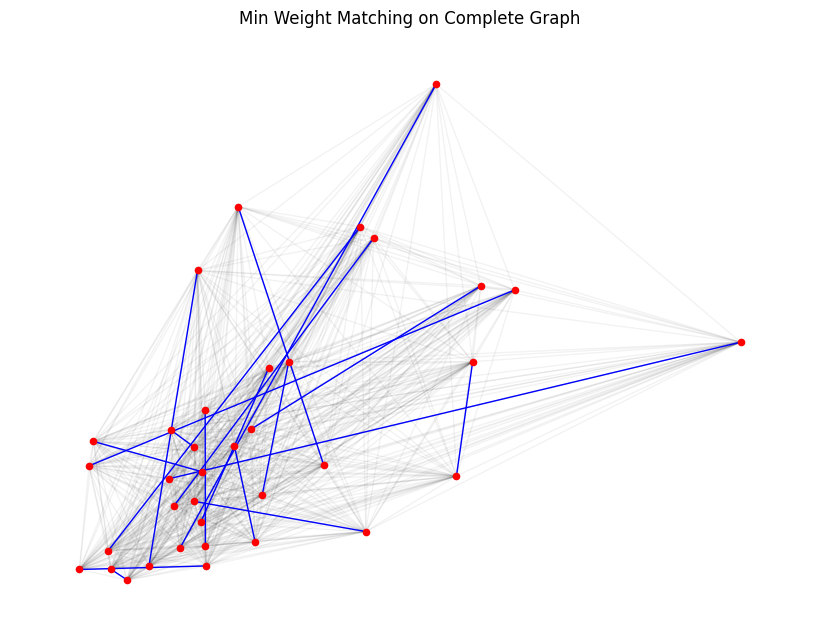

In [62]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

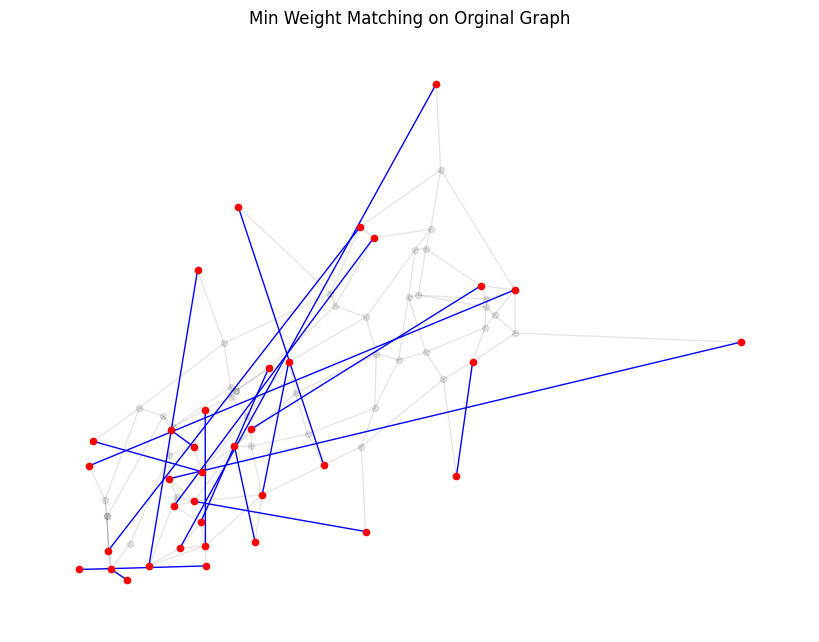

In [63]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

In [64]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """

    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0],
                           pair[1],
                           attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                                      'trail': 'augmented'}
                          )
    return graph_aug

In [65]:
# Create augmented graph: add the min weight matching edges to g
g_aug = add_augmenting_path_to_graph(g, odd_matching)

# Counts
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 123
Number of edges in augmented graph: 141


In [66]:
pd.value_counts(g_aug.degree())

(rs_end_north, 2)    1
(b_tt_2, 4)          1
(b_y, 4)             1
(b_o, 4)             1
(b_gy2, 4)           1
                    ..
(rh_end_north, 2)    1
(rt_end_south, 2)    1
(y_rt, 6)            1
(w_rt, 4)            1
(b_tt_3_dupe, 2)     1
Length: 77, dtype: int64

In [67]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='b_end_east'))

In [68]:
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 141


In [69]:
# Preview naive Euler circuit
naive_euler_circuit[0:10]

[('b_end_east', 'b_y'),
 ('b_y', 'park_east'),
 ('park_east', 'g_gy2'),
 ('g_gy2', 'w_gy2'),
 ('w_gy2', 'park_east'),
 ('park_east', 'b_o'),
 ('b_o', 'o_gy2'),
 ('o_gy2', 'y_gy2'),
 ('y_gy2', 'rs_end_south'),
 ('rs_end_south', 'y_rs')]

In [72]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the Eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))

    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])
        if 'trail' in edge_data[0] and edge_data[0]['trail'] != 'augmented':
            # If `edge` exists in the original graph, grab the edge attributes and add them to the Eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att))
        else:
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))

            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))

            # If `edge` does not exist in the original graph, find the shortest path between its nodes and
            # add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))

    return euler_circuit

In [73]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g, 'b_end_east')

Filling in edges for augmented edge: ('b_end_east', 'b_y')
Augmenting path: b_end_east => b_y
Augmenting path pairs: [('b_end_east', 'b_y')]

Filling in edges for augmented edge: ('b_y', 'park_east')
Augmenting path: b_y => park_east
Augmenting path pairs: [('b_y', 'park_east')]

Filling in edges for augmented edge: ('park_east', 'g_gy2')
Augmenting path: park_east => g_gy2
Augmenting path pairs: [('park_east', 'g_gy2')]

Filling in edges for augmented edge: ('g_gy2', 'w_gy2')
Augmenting path: g_gy2 => w_gy2
Augmenting path pairs: [('g_gy2', 'w_gy2')]

Filling in edges for augmented edge: ('w_gy2', 'park_east')
Augmenting path: w_gy2 => park_east
Augmenting path pairs: [('w_gy2', 'park_east')]

Filling in edges for augmented edge: ('park_east', 'b_o')
Augmenting path: park_east => b_o
Augmenting path pairs: [('park_east', 'b_o')]

Filling in edges for augmented edge: ('b_o', 'o_gy2')
Augmenting path: b_o => o_gy2
Augmenting path pairs: [('b_o', 'o_gy2')]

Filling in edges for augmented

In [75]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 227


In [76]:
# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('b_end_east', 'b_y', {'attr_dict': {'trail': 'b', 'distance': 1.32, 'color': 'blue', 'estimate': 0}})
1 ('b_y', 'park_east', {'attr_dict': {'trail': 'y', 'distance': 0.14, 'color': 'yellow', 'estimate': 0}})
2 ('park_east', 'g_gy2', {'attr_dict': {'trail': 'g', 'distance': 0.14, 'color': 'green', 'estimate': 0}})
3 ('g_gy2', 'w_gy2', {'attr_dict': {'trail': 'gy2', 'distance': 0.05, 'color': 'yellowgreen', 'estimate': 0}})
4 ('w_gy2', 'park_east', {'attr_dict': {'trail': 'w', 'distance': 0.12, 'color': 'gray', 'estimate': 0}})
5 ('park_east', 'b_o', {'attr_dict': {'trail': 'o', 'distance': 0.11, 'color': 'orange', 'estimate': 0}})
6 ('b_o', 'o_gy2', {'attr_dict': {'trail': 'o', 'distance': 0.06, 'color': 'orange', 'estimate': 0}})
7 ('o_gy2', 'y_gy2', {'attr_dict': {'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}})
8 ('y_gy2', 'y_rs', {'attr_dict': {'trail': 'y', 'distance': 0.16, 'color': 'yellow', 'estimate': 0}})
9 ('y_rs', 'rs_end_south', {'attr_dict': {'

In [79]:
# Computing some stats
if total_mileage_on_orig_trail_map == 0:
    percent_mileage_retraced = 0
else:
    percent_mileage_retraced = (1 - total_mileage_of_circuit / total_mileage_on_orig_trail_map) * -100

# Printing stats
print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on the original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit - total_mileage_on_orig_trail_map))
print('Percent of mileage retraced: {0:.2f}%\n'.format(percent_mileage_retraced))

print('Number of edges in circuit: {}'.format(len(euler_circuit)))
print('Number of edges in the original graph: {}'.format(len(g.edges())))
print('Number of nodes in the original graph: {}\n'.format(len(g.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit) - len(g.edges())))

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Mileage of circuit: 50.09
Mileage on the original trail map: 0.00
Mileage retracing edges: 50.09
Percent of mileage retraced: 0.00%

Number of edges in circuit: 227
Number of edges in the original graph: 123
Number of nodes in the original graph: 77

Number of edges traversed more than once: 104

Number of times visiting each node:
 n_visits  n_nodes
        9        1
        6        5
        5        8
        4       11
        3       17
        2       18
        1       17

Number of times visiting each edge:
 n_visits  n_edges
        1       51
        2       50
        3       15
        4        4
        5        3


Number of edges in CPP edge list: 123


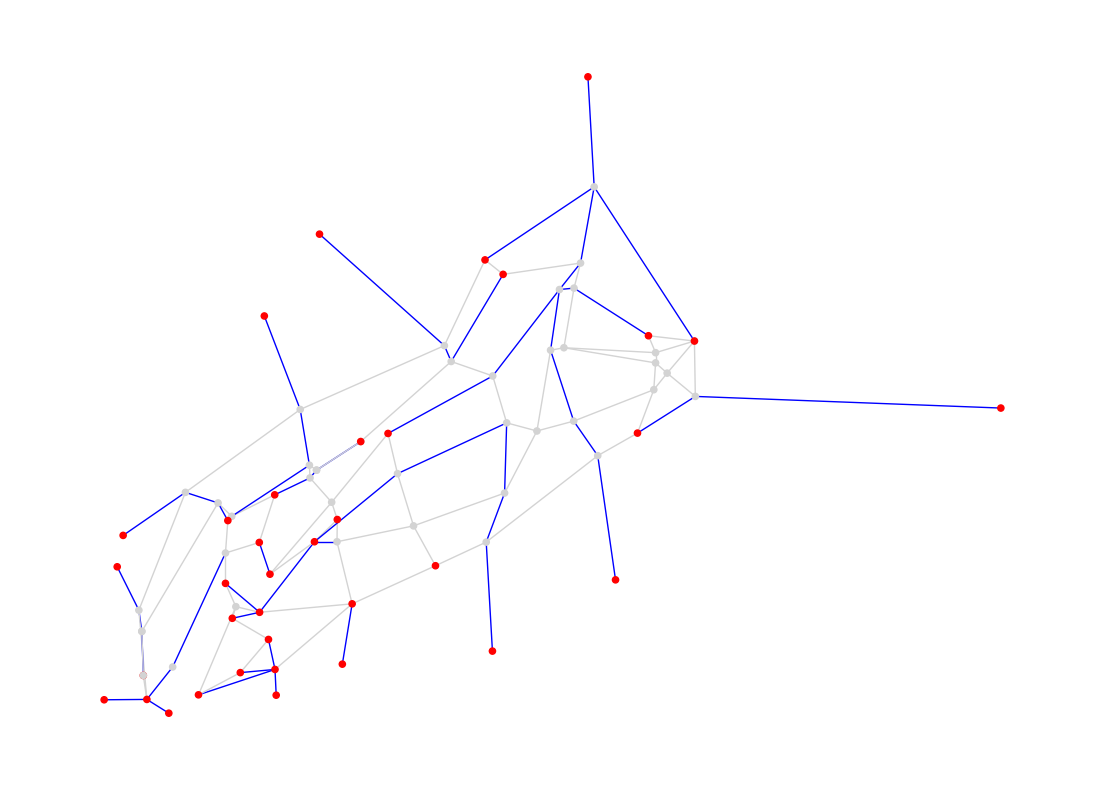

In [89]:
def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edges for visualization.
    Combine duplicate edges and keep track of their sequence and number of walks.
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1
        else:
            cpp_edgelist[edge] = e[0], e[1], {'sequence': str(i), 'visits': 1}

    return list(cpp_edgelist.values())

cpp_edgelist = create_cpp_edgelist(euler_circuit)

print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

# Preview CPP plot-friendly edge list
cpp_edgelist[0:3]

g_cpp = nx.Graph()

# Add nodes and edges to the graph
g_cpp.add_edges_from(cpp_edgelist)

plt.figure(figsize=(14, 10))

visit_colors = {1: 'lightgray', 2: 'blue'}
edge_colors = [visit_colors.get(e[2].get('visits', 1), 'lightgray') for e in g_cpp.edges(data=True)]
node_colors = ['red' if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

In [90]:
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

Number of edges in CPP edge list: 123


In [91]:
# Preview CPP plot-friendly edge list
cpp_edgelist[0:3]

[('b_end_east', 'b_y', {'sequence': '0, 226', 'visits': 2}),
 ('b_y', 'park_east', {'sequence': '1', 'visits': 1}),
 ('park_east', 'g_gy2', {'sequence': '2', 'visits': 1})]

In [92]:
g_cpp = nx.Graph(cpp_edgelist)

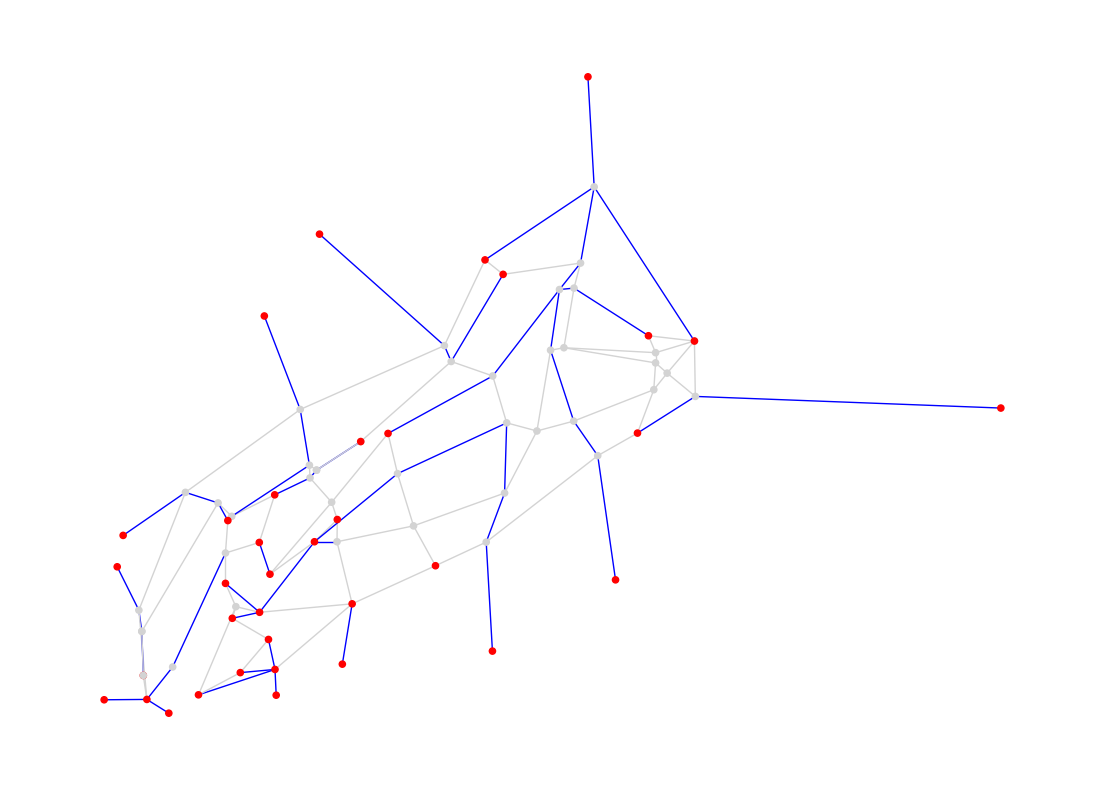

In [94]:
plt.figure(figsize=(14, 10))

visit_colors = {1: 'lightgray', 2: 'blue'}
edge_colors = [visit_colors.get(e[2].get('visits', 1), 'lightgray') for e in g_cpp.edges(data=True)]
node_colors = ['red' if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

In [104]:
import random

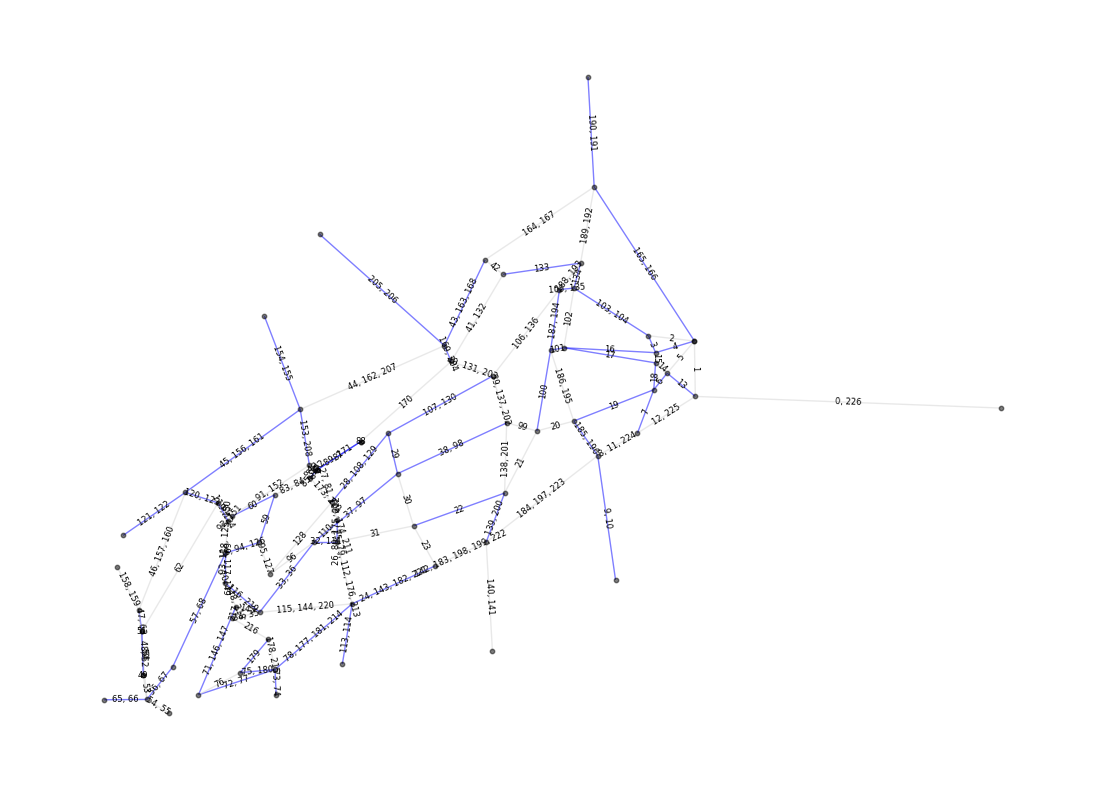

In [105]:
plt.figure(figsize=(14, 10))
edge_colors = [random.choice(['lightgray', 'blue']) for _ in g_cpp.edges()]
nx.draw_networkx(g_cpp, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, with_labels=False, alpha=0.5)
bbox = {'ec': [1, 1, 1, 0], 'fc': [1, 1, 1, 0]}  # hack to label edges over line (rather than breaking up line)
edge_labels = nx.get_edge_attributes(g_cpp, 'sequence')
nx.draw_networkx_edge_labels(g_cpp, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=6)
plt.axis('off')
plt.show()

In [108]:
import os

# Create the directory if it doesn't exist
os.makedirs('fig/png', exist_ok=True)

In [117]:
plt.figure(figsize=(14, 10))

edge_colors = []
for i, e in enumerate(euler_circuit, start=1):
    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    # Full graph (faded in background)
    nx.draw_networkx(g_cpp, pos=node_positions, node_size=6, node_color='gray', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[:i])
    for e_i in euler_circuit_i:
        edge_i = frozenset([e_i[0], e_i[1]])
        e_i[2]['visits_i'] = edge_cnter.get(edge_i, 0)
    g_i_edge_colors = [visit_colors.get(e[2].get('visits_i', 1), 'black') for e in g_i.edges(data=True)]
    g_i_edge_colors = [color if color is not None else 'black' for color in g_i_edge_colors]

    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='lightgray', linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=g_i_edge_colors, alpha=1.0)

    plt.axis('off')
    plt.savefig('fig/png/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [112]:
import glob
import numpy as np
import imageio
import os

In [119]:
def make_circuit_video(image_path, movie_filename, fps=5):
    # Sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = sorted(range(len(filenames)), key=lambda k: int(os.path.basename(filenames[k]).split('.')[0][3:]))
    filenames = [filenames[i] for i in filenames_sort_indices]

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(movie_filename), exist_ok=True)

    # Make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('fig/png/', 'fig/gif/cpp_route_animation.gif', fps=3)

C:\Users\testi\AppData\Local\Temp\ipykernel_3460\748093254.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [120]:
import networkx as nx
import numpy as np

from IPython.display import SVG

In [130]:
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
import scipy.sparse as sp

adjacency = sp.csr_matrix(nx.adjacency_matrix(G))

In [135]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):
    adjacency = nx.to_numpy_array(G)
    adjacency_sparse = sp.csr_matrix(adjacency)

    names = np.array(list(G.nodes()))

    graph = Bunch()
    graph.adjacency = adjacency_sparse
    graph.names = names

    pagerank = PageRank()

    scores = pagerank.fit_transform(adjacency_sparse)

    if show_names:
        image = svg_graph(
            graph.adjacency,
            font_size=font_size,
            node_size=node_size,
            names=graph.names,
            width=700,
            height=500,
            scores=scores,
            edge_width=edge_width
        )
    else:
        image = svg_graph(
            graph.adjacency,
            node_size=node_size,
            width=700,
            height=500,
            scores=scores,
            edge_width=edge_width
        )

    return SVG(image)


In [136]:
G = nx.les_miserables_graph()
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

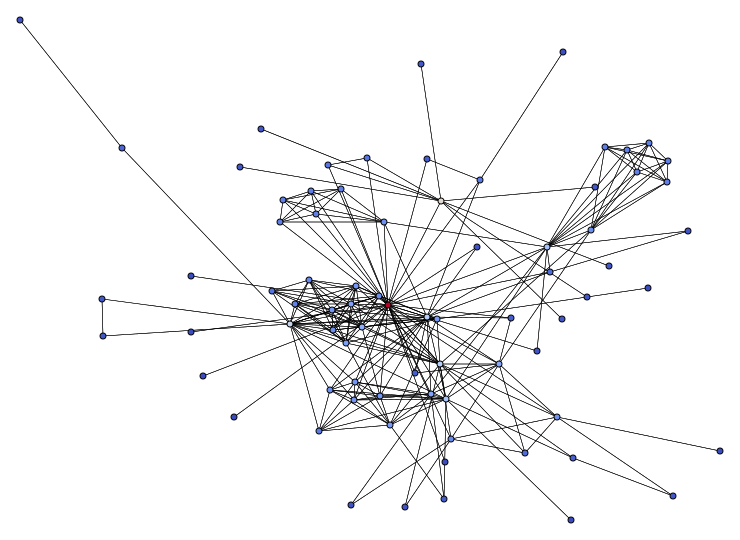

In [137]:
# this is a network / graph

draw_graph(G, node_size=3)

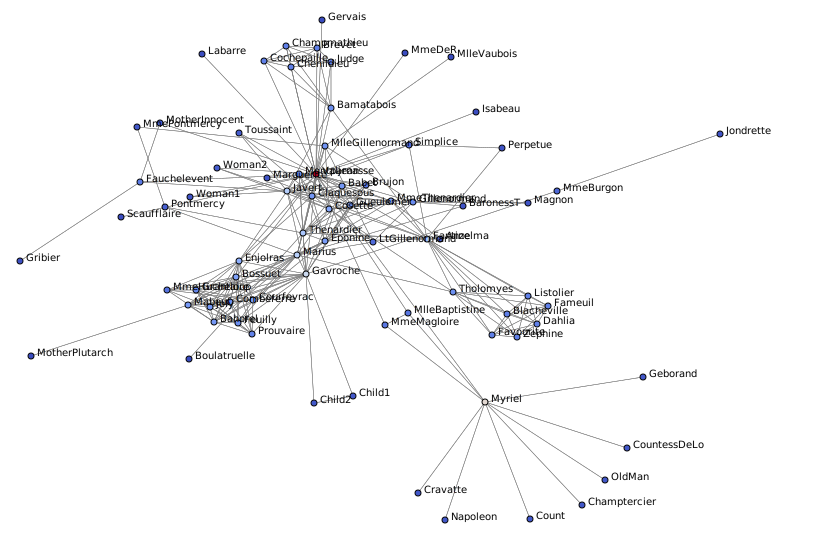

In [138]:
# with labels

draw_graph(G, node_size=3, show_names=True) 

In [139]:
# these are ten of the nodes

sorted(G.nodes)[0:10]

['Anzelma',
 'Babet',
 'Bahorel',
 'Bamatabois',
 'BaronessT',
 'Blacheville',
 'Bossuet',
 'Boulatruelle',
 'Brevet',
 'Brujon']

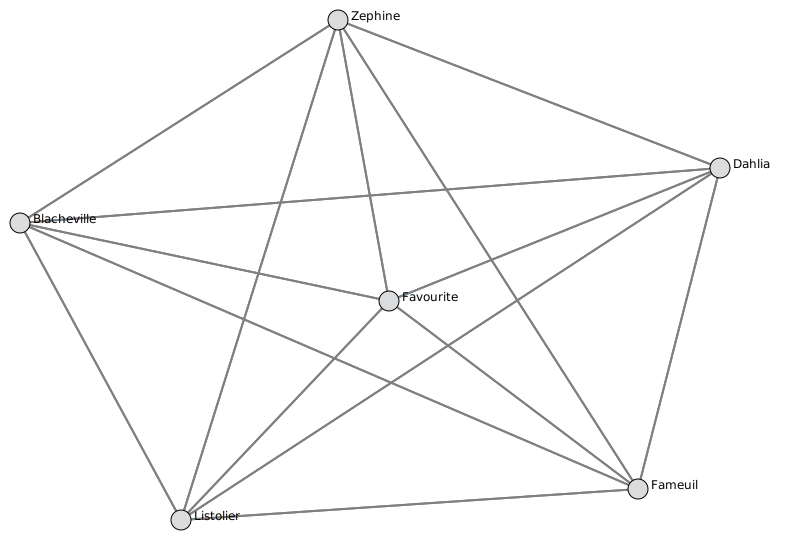

In [140]:
subgraph_nodes = ['Dahlia', 'Favourite', 'Listolier', 'Fameuil', 'Zephine', 'Blacheville']

G_sub = G.subgraph(subgraph_nodes)

draw_graph(G_sub, node_size=10, font_size=12, edge_width=2, show_names=True)